In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../input/nlp-getting-started/train.csv")

In [3]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df = df.drop(["id", "keyword", "location"], axis = 1)

In [6]:
df.groupby("target").describe()

text                                                               
       count unique                                                top freq
target                                                                     
0       4342   4315  The Prophet (peace be upon him) said 'Save you...    4
1       3271   3206  11-Year-Old Boy Charged With Manslaughter of T...   10

In [7]:
for i in range(0,10):
    print(f"Tweet {i+1}: \n")
    print("Label = " + str(df["target"][i]) +"\n")
    print(df["text"][i] +"\n")

Tweet 1: 

Label = 1

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all

Tweet 2: 

Label = 1

Forest fire near La Ronge Sask. Canada

Tweet 3: 

Label = 1

All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected

Tweet 4: 

Label = 1

13,000 people receive #wildfires evacuation orders in California 

Tweet 5: 

Label = 1

Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 

Tweet 6: 

Label = 1

#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires

Tweet 7: 

Label = 1

#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas

Tweet 8: 

Label = 1

I'm on top of the hill and I can see a fire in the woods...

Tweet 9: 

Label = 1

There's an emergency evacuation happening now in the building across the street

Tweet 10: 

Label = 1

I'm afraid that the torna

In [8]:
X_train = df["text"]
y_train = df["target"]

In [9]:
!pip install tensorflow-text
import tensorflow_hub as hub
import tensorflow_text as text

2022-11-08 14:11:31.560930: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-08 14:11:31.730428: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-08 14:11:32.554838: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local

In [10]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [11]:
bert_preprocess = hub.KerasLayer(preprocess_url)
bert_encoder = hub.KerasLayer(encoder_url)

2022-11-08 14:11:34.039045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 14:11:34.049093: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 14:11:34.049887: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 14:11:34.050907: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
import tensorflow as tf

In [13]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [14]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout1")(outputs['pooled_output'])
l = tf.keras.layers.Dense(100,  activation='relu', name='output1')(l)
l = tf.keras.layers.Dropout(0.2, name="dropout2")(l)
l = tf.keras.layers.Dense(50, activation='relu', name='output2')(l)
l = tf.keras.layers.Dropout(0.2, name="dropout3")(l)
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [16]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
238/238 [==============================] - 61s 216ms/step - loss: 0.6406 - accuracy: 0.6432
Epoch 2/50
238/238 [==============================] - 51s 215ms/step - loss: 0.6074 - accuracy: 0.6770
Epoch 3/50
238/238 [==============================] - 51s 215ms/step - loss: 0.5937 - accuracy: 0.6942
Epoch 4/50
238/238 [==============================] - 51s 216ms/step - loss: 0.5841 - accuracy: 0.7077
Epoch 5/50
238/238 [==============================] - 51s 216ms/step - loss: 0.5578 - accuracy: 0.7252
Epoch 6/50
238/238 [==============================] - 53s 223ms/step - loss: 0.5639 - accuracy: 0.7235
Epoch 7/50
238/238 [==============================] - 51s 216ms/step - loss: 0.5516 - accuracy: 0.7302
Epoch 8/50
238/238 [==============================] - 51s 215ms/step - loss: 0.5440 - accuracy: 0.7381
Epoch 9/50
238/238 [==============================] - 52s 217ms/step - loss: 0.5404 - accuracy: 0.7425
Epoch 10/50
238/238 [==============================] - 51s 216ms/step - l

In [18]:
acc = history.history['accuracy']

loss = history.history['loss']

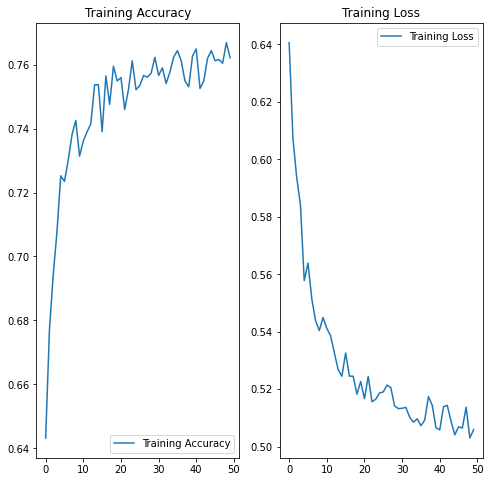

In [20]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [21]:
X_test = pd.read_csv("../input/nlp-getting-started/test.csv")

In [22]:
X_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [23]:
X_test = X_test.drop(["id", "keyword", "location"], axis = 1)

In [24]:
X_test

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan
...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,Storm in RI worse than last hurricane. My city...
3260,Green Line derailment in Chicago http://t.co/U...
3261,MEG issues Hazardous Weather Outlook (HWO) htt...


In [25]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()

102/102 [==============================] - 22s 213ms/step


In [26]:
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [27]:
y_pred.shape

(3263,)

In [28]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [29]:
y_pred = pd.DataFrame(y_pred, columns = ["target"])

In [30]:
y_pred

,target
0,1
1,1
2,1
3,1
4,1
...,...
3258,0
3259,1
3260,1
3261,1


In [31]:
y_pred.to_csv("y_pred.csv")